In [3]:
!pip install pandas textblob openpyxl
!pip install wordcloud

In [4]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [5]:
# Path to the input Excel file
input_file = '/Users/navyakakandula/Desktop/Kari/Output Files/Book_Reviews.xlsx'
output_file = '/Users/navyakakandula/Desktop/Kari/Output Files/Sentiment_Analysis.xlsx'

# Read the Excel file using openpyxl engine
excel_data = pd.ExcelFile(input_file, engine='openpyxl')

# Perform sentiment analysis on each sheet
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    for sheet_name in excel_data.sheet_names:
        # Read the sheet into a DataFrame
        df = pd.read_excel(input_file, sheet_name=sheet_name, engine='openpyxl')

        # Assuming the comments are in a column named 'Reviews'
        # If your column name is different, change it accordingly

        # Ensure all entries in the 'Reviews' column are strings
        df['Reviews'] = df['Reviews'].astype(str)

        # Perform sentiment analysis
        df['Polarity'] = df['Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
        df['Subjectivity'] = df['Reviews'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

        # Save the updated DataFrame to a new sheet in the output Excel file
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Sentiment analysis completed and saved to {output_file}")

Sentiment analysis completed and saved to /Users/navyakakandula/Desktop/Kari/Output Files/Sentiment_Analysis.xlsx


In [ ]:
# import pandas as pd
# from textblob import TextBlob
# import matplotlib.pyplot as plt
# import seaborn as sns
# from wordcloud import WordCloud

# # Path to the input and output Excel files
# input_file = '/Users/navyakakandula/Desktop/Kari/Output Files/Book_Reviews.xlsx'
# output_file = '/Users/navyakakandula/Desktop/Kari/Output Files/Sentiment_Analysis.xlsx'
# output_high_subjective_file = '/Users/navyakakandula/Desktop/Kari/Output Files/High_Subjective_Reviews.xlsx'

# # Read the Excel file using openpyxl engine
# excel_data = pd.ExcelFile(input_file, engine='openpyxl')

# # Initialize a list to store high subjective reviews
# high_subjective_reviews = []

# # Perform sentiment analysis on each sheet
# with pd.ExcelWriter(output_sentiment_file, engine='openpyxl') as writer:
#     for sheet_name in excel_data.sheet_names:
#         # Read the sheet into a DataFrame
#         df = pd.read_excel(input_file, sheet_name=sheet_name, engine='openpyxl')

#         # Ensure all entries in the 'Reviews' column are strings
#         df['Reviews'] = df['Reviews'].astype(str)

#         # Perform sentiment analysis
#         df['Polarity'] = df['Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
#         df['Subjectivity'] = df['Reviews'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

#         # Save the updated DataFrame to a new sheet in the output Excel file
#         df.to_excel(writer, sheet_name=sheet_name, index=False)

#         # Filter high subjective reviews
#         high_subjective_df = df[df['Subjectivity'] > 0.8].copy()
#         high_subjective_df.loc[:, 'Source'] = sheet_name  # Add a column for the source name
#         high_subjective_reviews.append(high_subjective_df)

# # Concatenate all high subjective reviews into one DataFrame
# high_subjective_reviews_df = pd.concat(high_subjective_reviews, ignore_index=True)

# # Save the high subjective reviews to a new Excel file
# with pd.ExcelWriter(output_high_subjective_file, engine='openpyxl') as writer:
#     high_subjective_reviews_df.to_excel(writer, sheet_name='High_Subjective_Reviews', index=False)

# print(f"Sentiment analysis completed and saved to {output_sentiment_file}")
# print(f"High subjective reviews filtered and saved to {output_high_subjective_file}")


In [6]:
# Load the sentiment analysis results
output_file = '/Users/navyakakandula/Desktop/Kari/Output Files/Sentiment_Analysis.xlsx'
excel_data = pd.ExcelFile(output_file, engine='openpyxl')

# Initialize a dictionary to store DataFrames for each sheet
data_frames = {}

# Read each sheet into a DataFrame and store in the dictionary
for sheet_name in excel_data.sheet_names:
    data_frames[sheet_name] = pd.read_excel(output_file, sheet_name=sheet_name, engine='openpyxl')

Plotting for sheet: good_reads


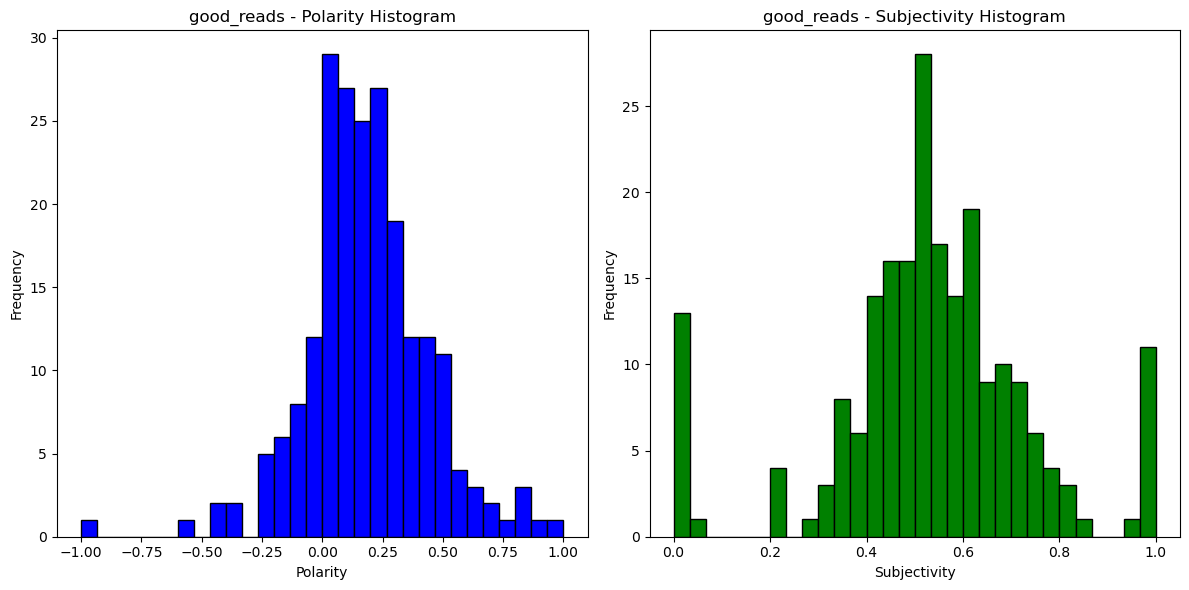

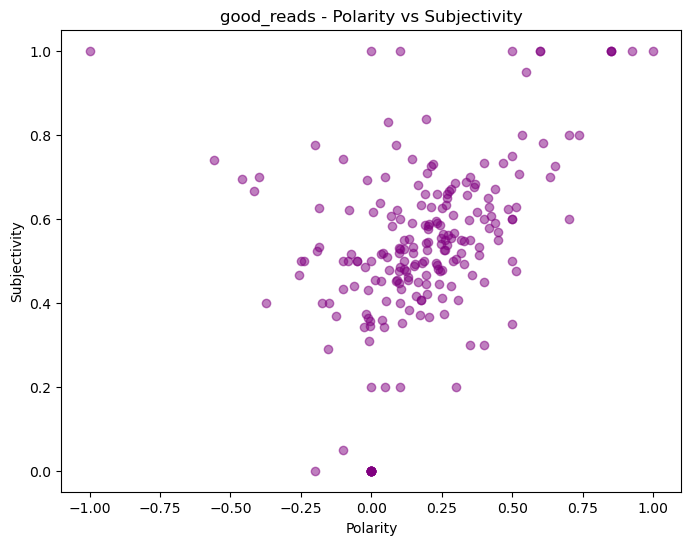

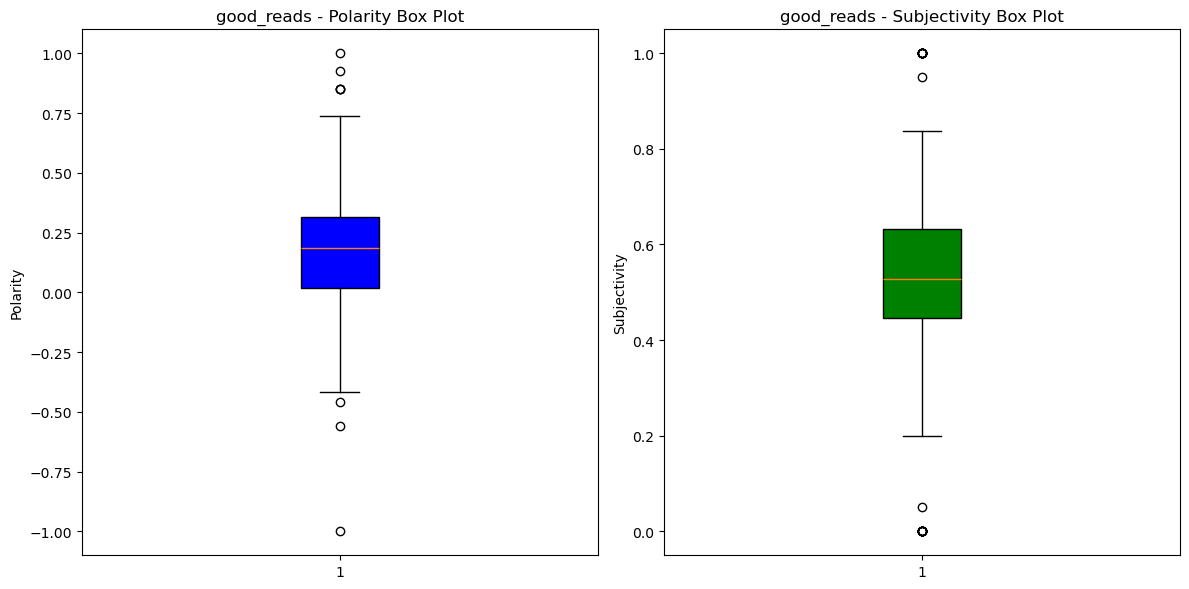

Plotting for sheet: Flipkart


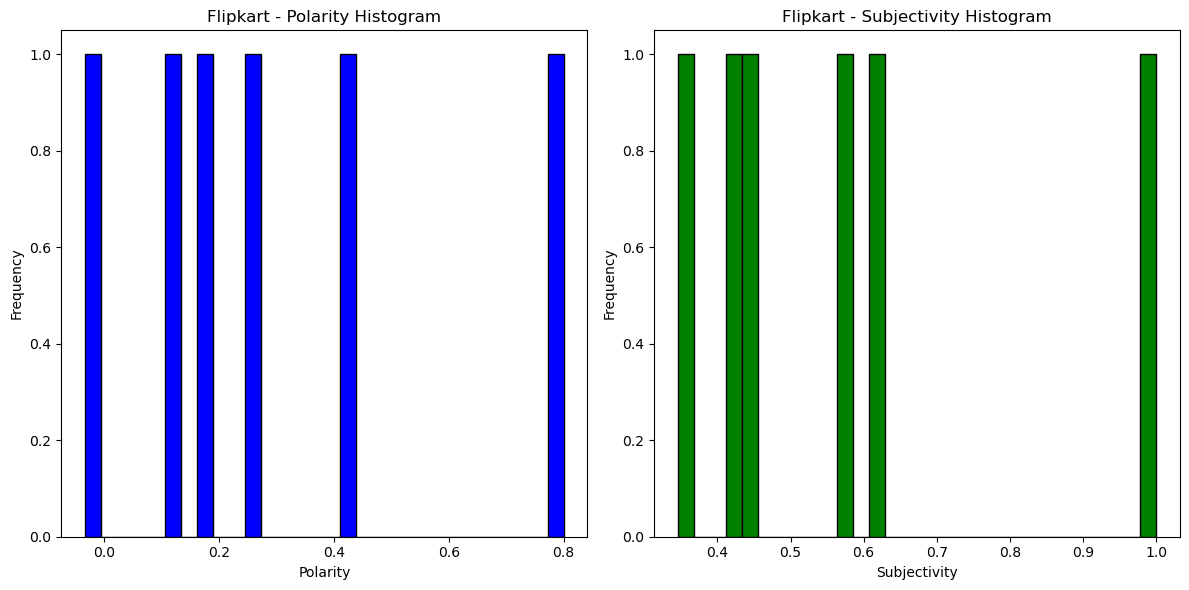

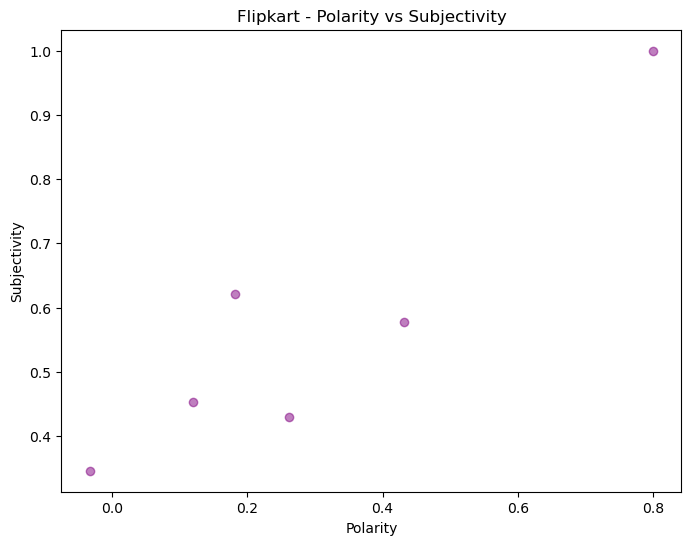

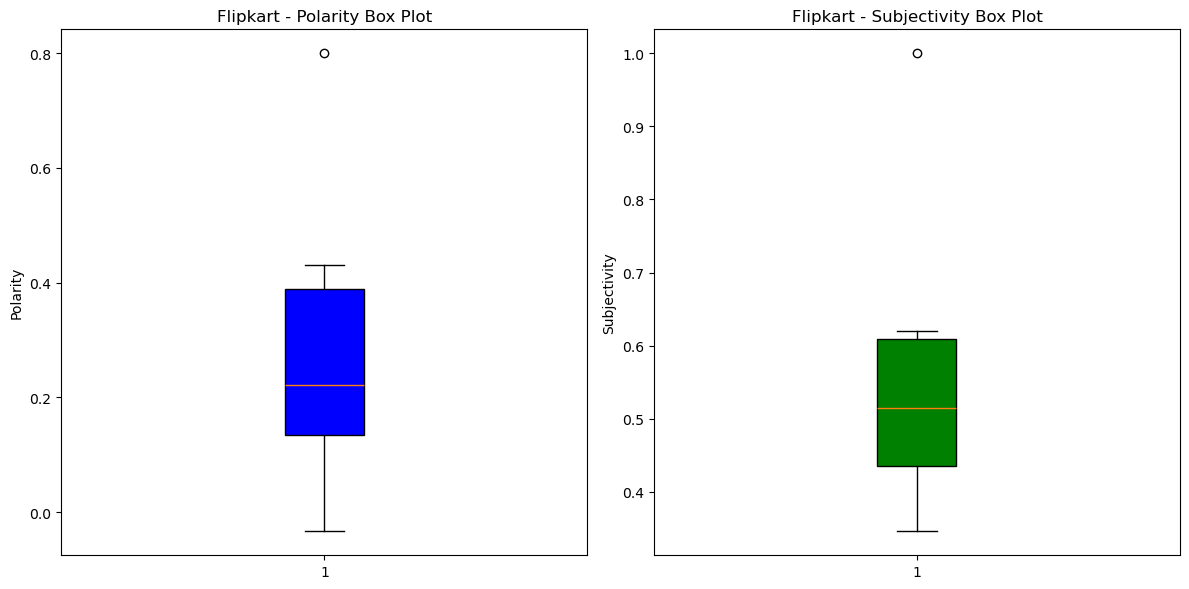

Plotting for sheet: Amazon.com


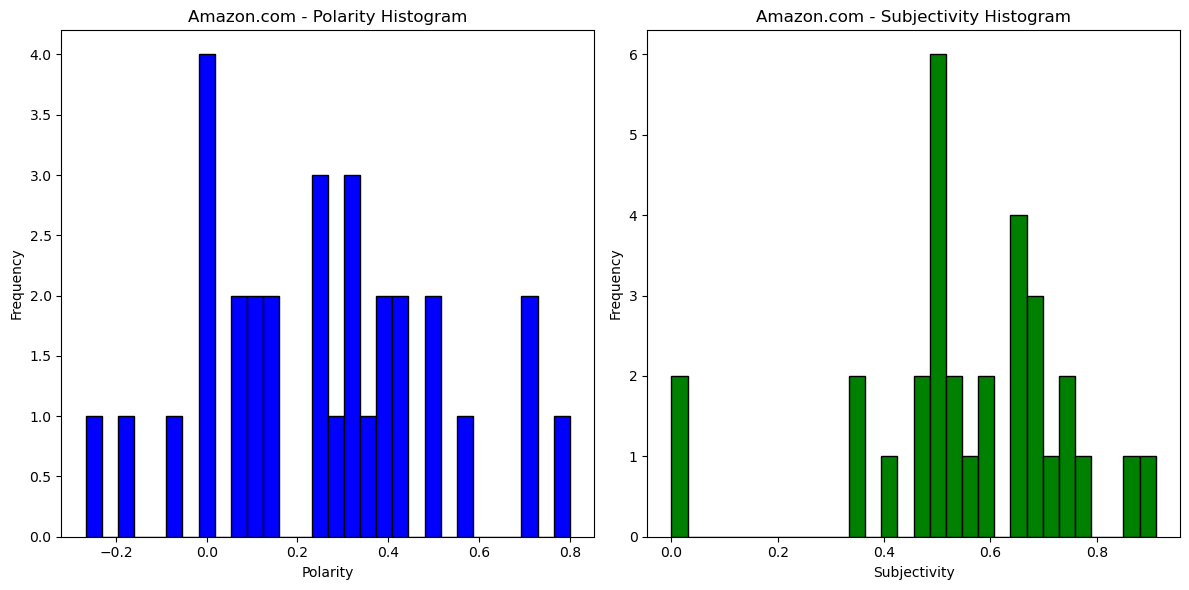

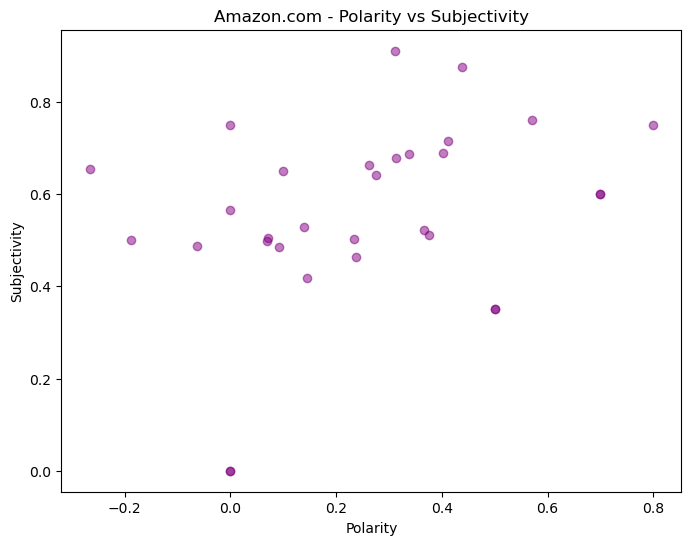

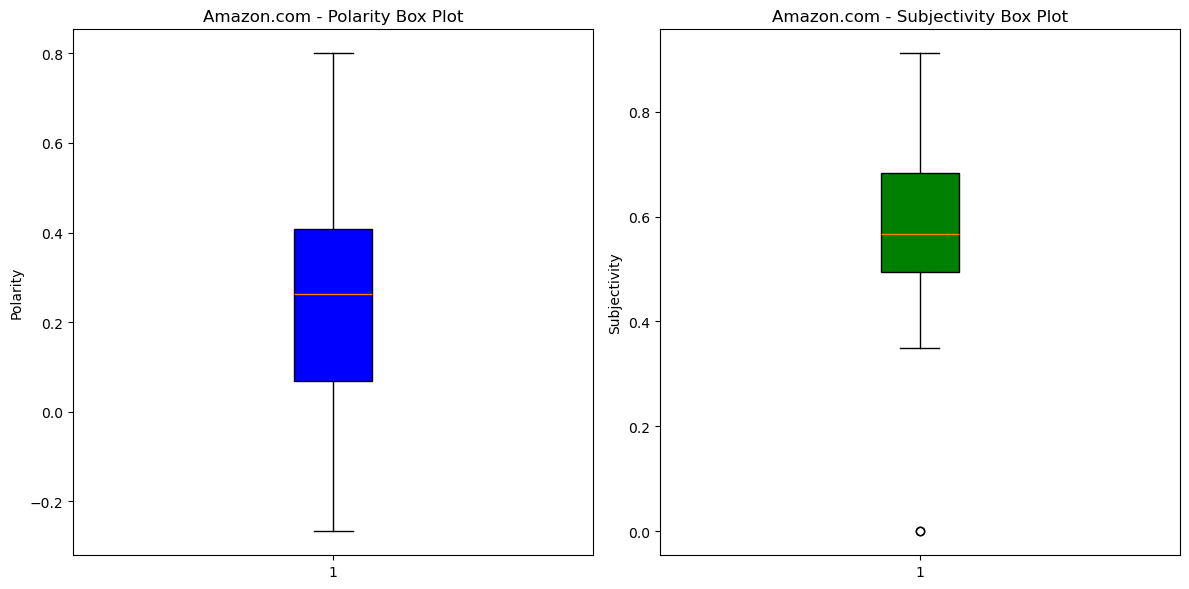

Plotting for sheet: Amazon.in


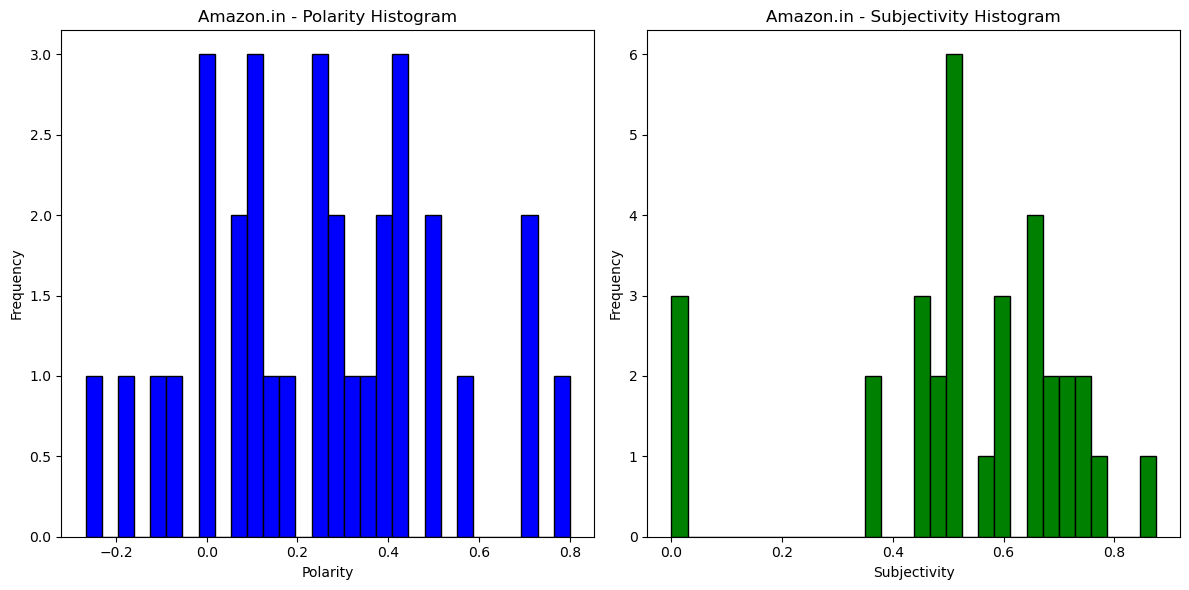

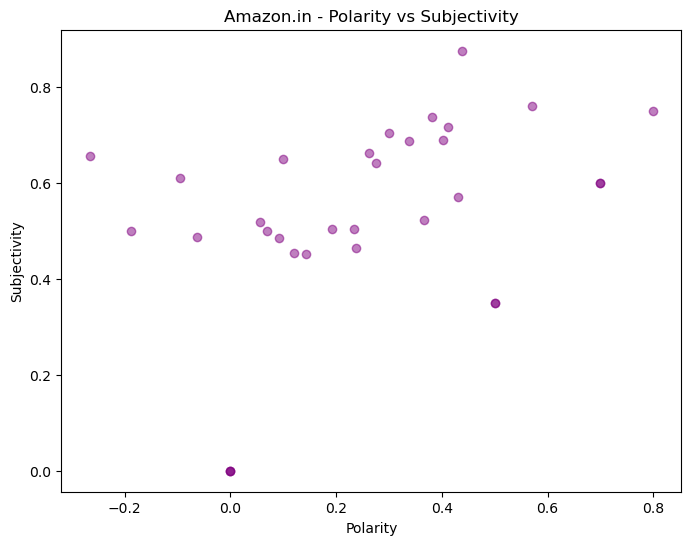

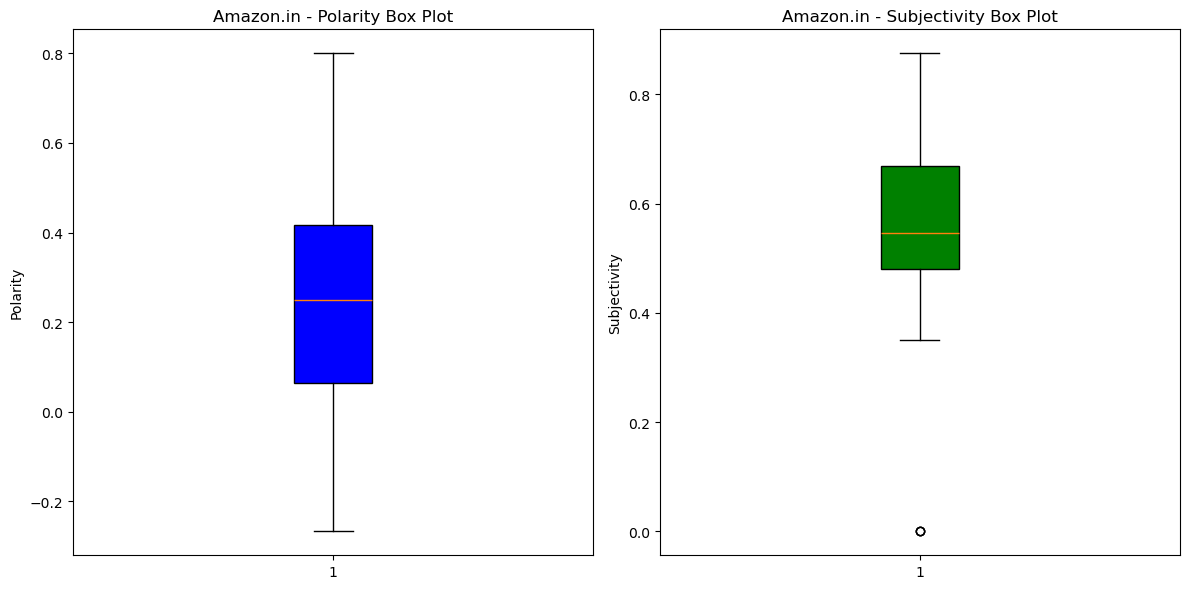

Plotting for sheet: the_story_graph


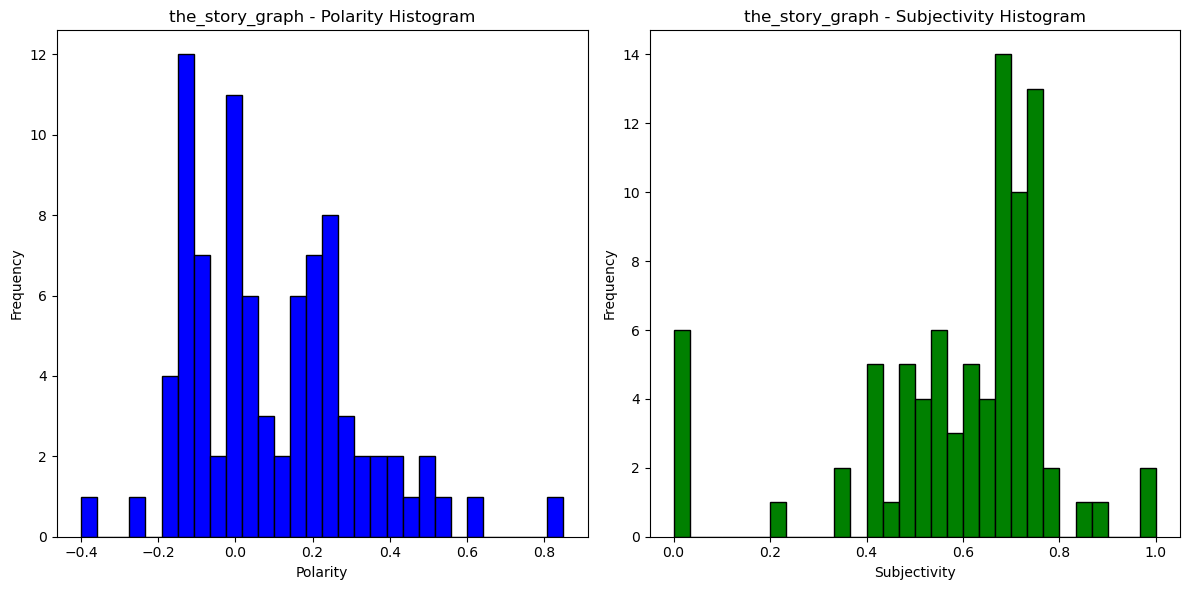

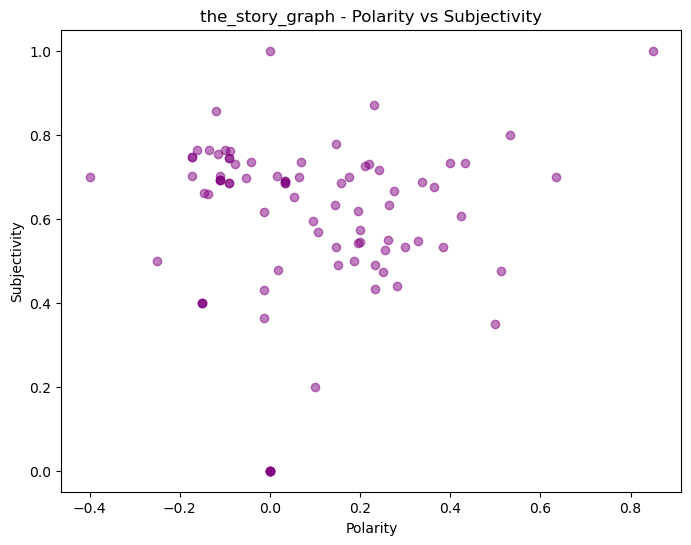

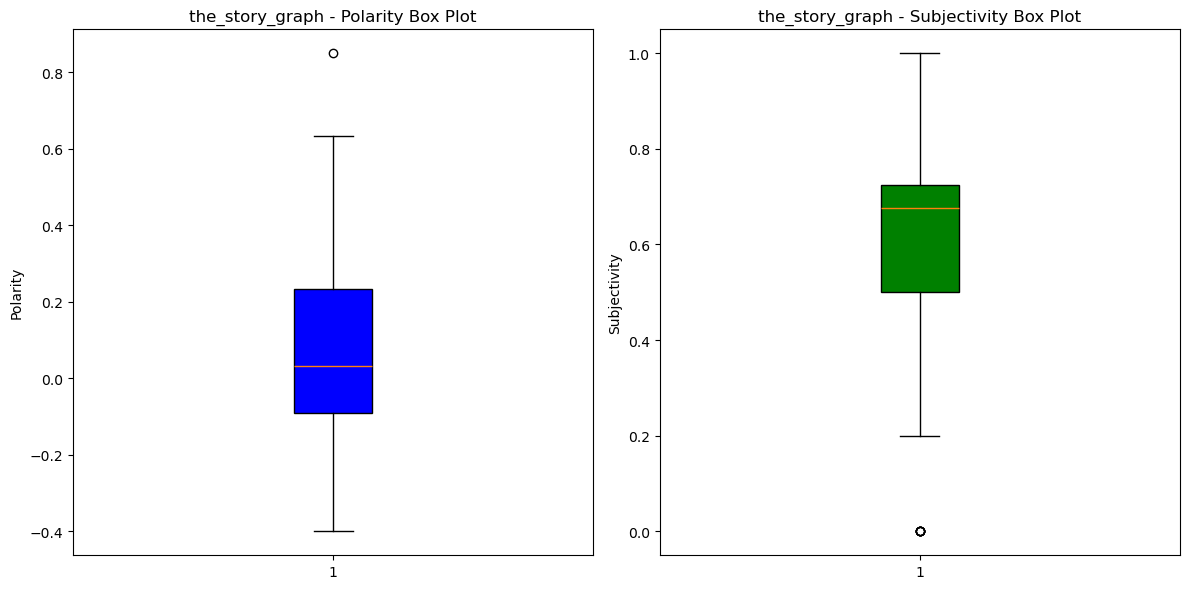

In [7]:
# Function to plot histograms for polarity and subjectivity
def plot_histograms(df, sheet_name):
    plt.figure(figsize=(12, 6))

    # Plot histogram for polarity
    plt.subplot(1, 2, 1)
    plt.hist(df['Polarity'], bins=30, color='blue', edgecolor='black')
    plt.title(f'{sheet_name} - Polarity Histogram')
    plt.xlabel('Polarity')
    plt.ylabel('Frequency')

    # Plot histogram for subjectivity
    plt.subplot(1, 2, 2)
    plt.hist(df['Subjectivity'], bins=30, color='green', edgecolor='black')
    plt.title(f'{sheet_name} - Subjectivity Histogram')
    plt.xlabel('Subjectivity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Function to plot bar plots for average polarity and subjectivity per sheet
def plot_bar_plots(data_frames):
    sheet_names = list(data_frames.keys())
    avg_polarity = [data_frames[sheet]['Polarity'].mean() for sheet in sheet_names]
    avg_subjectivity = [data_frames[sheet]['Subjectivity'].mean() for sheet in sheet_names]

    plt.figure(figsize=(12, 6))

    # Bar plot for average polarity
    plt.subplot(1, 2, 1)
    plt.bar(sheet_names, avg_polarity, color='blue')
    plt.title('Average Polarity per source of reviews')
    plt.xlabel('Review Source')
    plt.ylabel('Average Polarity')
    plt.xticks(rotation=45)

    # Bar plot for average subjectivity
    plt.subplot(1, 2, 2)
    plt.bar(sheet_names, avg_subjectivity, color='green')
    plt.title('Average Subjectivity per source of reviews')
    plt.xlabel('Review Source')
    plt.ylabel('Average Subjectivity')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Function to plot scatter plot for polarity vs subjectivity
def plot_scatter_plot(df, sheet_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(df['Polarity'], df['Subjectivity'], alpha=0.5, color='purple')
    plt.title(f'{sheet_name} - Polarity vs Subjectivity')
    plt.xlabel('Polarity')
    plt.ylabel('Subjectivity')
    plt.show()

# Function to plot box plots for polarity and subjectivity
def plot_box_plots(df, sheet_name):
    plt.figure(figsize=(12, 6))

    # Box plot for polarity
    plt.subplot(1, 2, 1)
    plt.boxplot(df['Polarity'], patch_artist=True, boxprops=dict(facecolor='blue'))
    plt.title(f'{sheet_name} - Polarity Box Plot')
    plt.ylabel('Polarity')

    # Box plot for subjectivity
    plt.subplot(1, 2, 2)
    plt.boxplot(df['Subjectivity'], patch_artist=True, boxprops=dict(facecolor='green'))
    plt.title(f'{sheet_name} - Subjectivity Box Plot')
    plt.ylabel('Subjectivity')

    plt.tight_layout()
    plt.show()

# Plotting the graphs for each sheet
for sheet_name, df in data_frames.items():
    print(f'Plotting for sheet: {sheet_name}')
    plot_histograms(df, sheet_name)
    plot_scatter_plot(df, sheet_name)
    plot_box_plots(df, sheet_name)

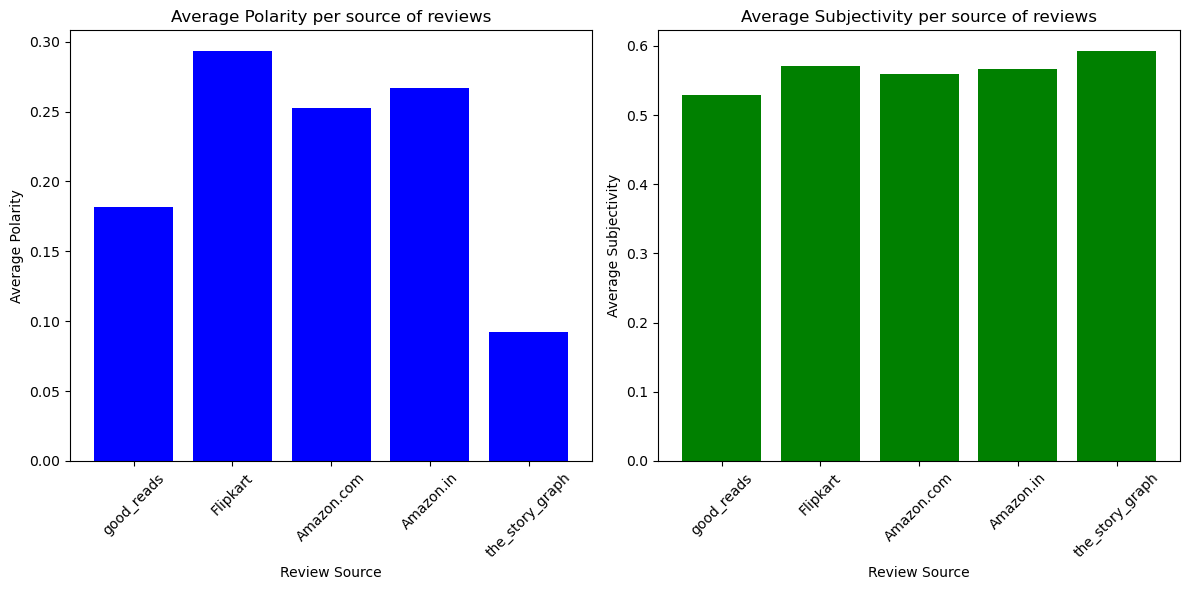

In [9]:
# Plot bar plots for average polarity and subjectivity across sheets
plot_bar_plots(data_frames)

In [8]:
import matplotlib.pyplot as plt

def plot_combined_scatter(data_frames):
    plt.figure(figsize=(10, 8))

    # Define a color map (as many colors as there are platforms)
    colors = plt.cm.tab10.colors  # Up to 10 distinct colors
    sheet_names = list(data_frames.keys())

    for idx, (sheet_name, df) in enumerate(data_frames.items()):
        plt.scatter(
            df['Polarity'], 
            df['Subjectivity'], 
            alpha=0.5, 
            color=colors[idx % len(colors)],  # Cycle through colors if more than 10 sheets
            label=sheet_name
        )

    plt.title('Polarity vs Subjectivity - All Platforms')
    plt.xlabel('Polarity')
    plt.ylabel('Subjectivity')
    plt.legend(title='Review Source')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

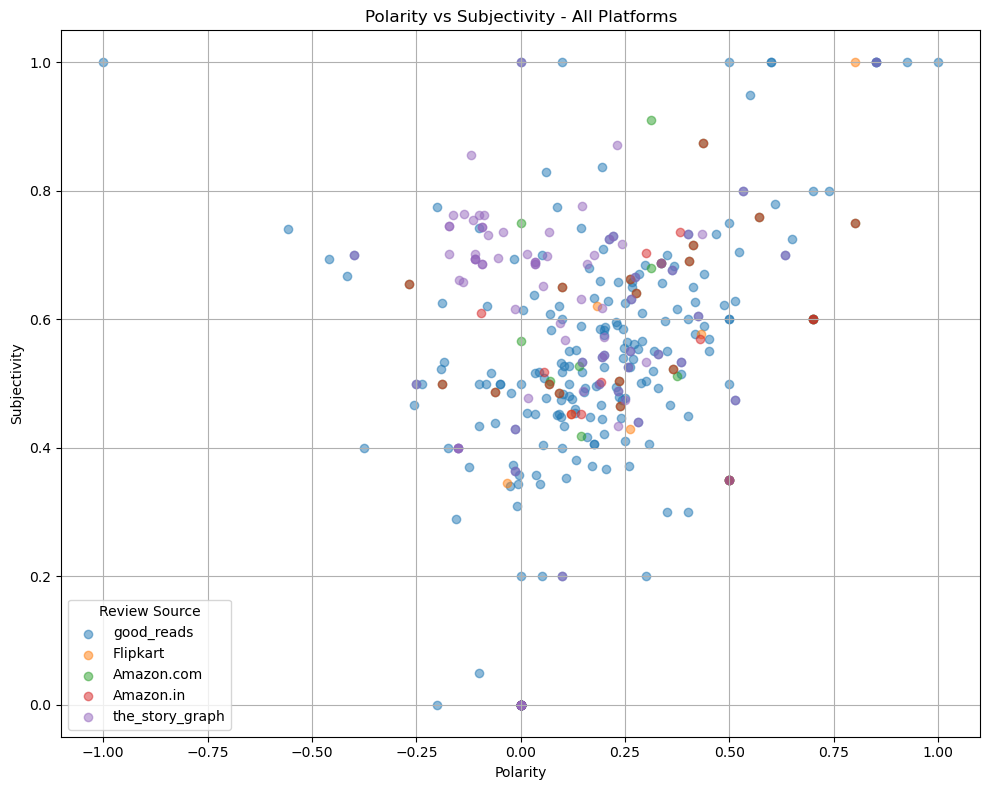

In [9]:
plot_combined_scatter(data_frames)

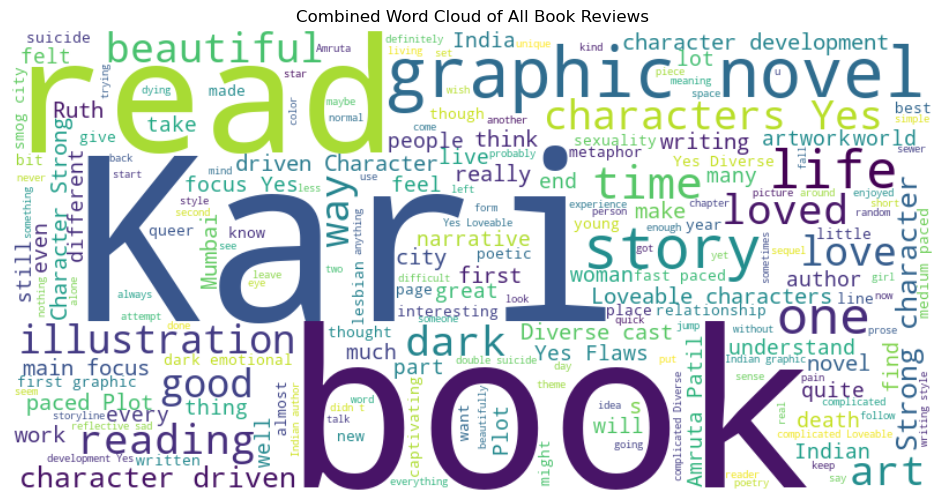

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Define output file path
output_file = '/Users/navyakakandula/Desktop/Kari/Output Files/Sentiment_Analysis.xlsx'

# Read data from each sheet
sheet_names = ['good_reads', 'Flipkart', 'Amazon.com', 'Amazon.in', 'the_story_graph']

# Combine all reviews from all sheets into one big text
all_reviews = []

for sheet in sheet_names:
    df = pd.read_excel(output_file, sheet_name=sheet, engine='openpyxl')
    reviews = df['Reviews'].dropna().astype(str).tolist()
    all_reviews.extend(reviews)

combined_text = ' '.join(all_reviews)

# Generate the combined word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(combined_text)

# Plot the combined word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Combined Word Cloud of All Book Reviews')
plt.show()


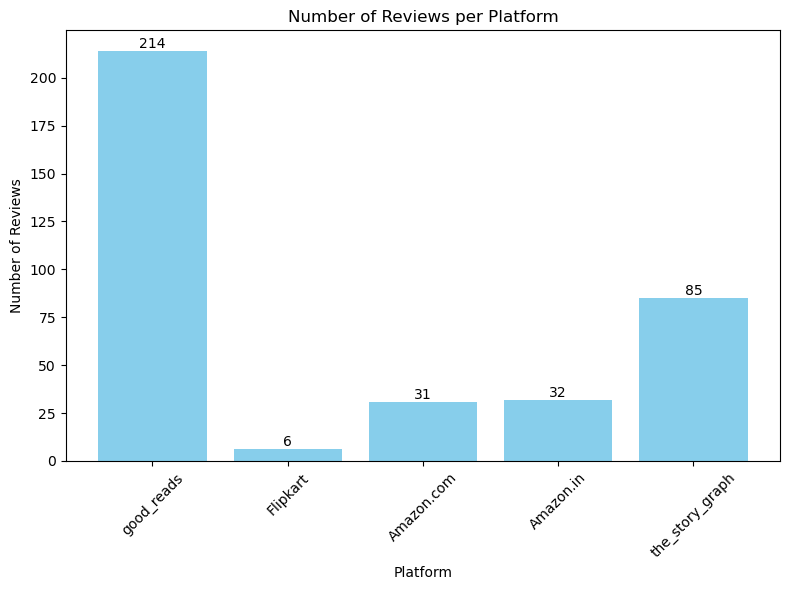

In [14]:
import matplotlib.pyplot as plt

# Assuming you have loaded your DataFrames as before
data_frames = {
    'good_reads': df_good_reads,
    'Flipkart': df_flipkart,
    'Amazon.com': df_amazon_com,
    'Amazon.in': df_amazon_in,
    'the_story_graph': df_the_story_graph
}

# Calculate review counts per platform
review_counts = {platform: len(df) for platform, df in data_frames.items()}

# Plot bar chart
plt.figure(figsize=(8,6))
bars = plt.bar(review_counts.keys(), review_counts.values(), color='skyblue')
plt.title('Number of Reviews per Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)

# Add the count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


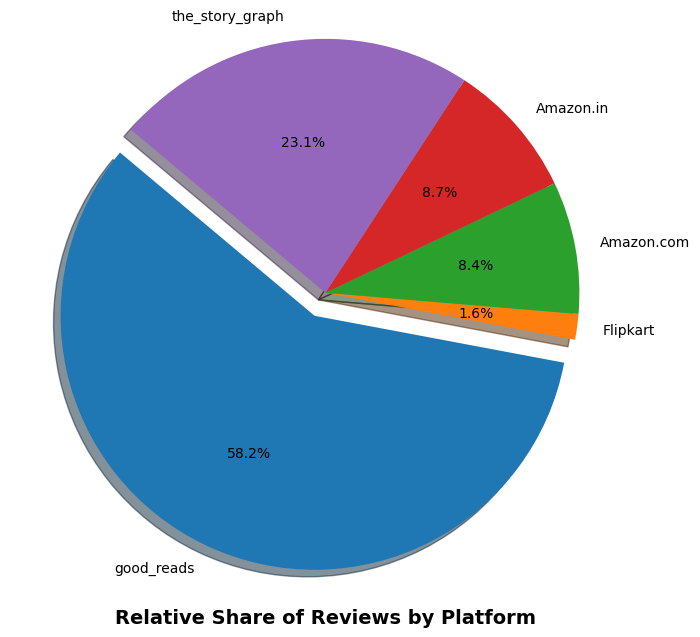

In [16]:
import matplotlib.pyplot as plt

# Your data
review_counts = {
    'good_reads': len(df_good_reads),
    'Flipkart': len(df_flipkart),
    'Amazon.com': len(df_amazon_com),
    'Amazon.in': len(df_amazon_in),
    'the_story_graph': len(df_the_story_graph)
}

labels = list(review_counts.keys())
sizes = list(review_counts.values())
explode = [0.1 if size == max(sizes) else 0 for size in sizes]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
plt.axis('equal')  # Makes pie chart circular

# Instead of plt.title(), add title below the plot
plt.subplots_adjust(bottom=0.15)  # Adjust bottom space to fit the title

plt.text(0, -1.3, 'Relative Share of Reviews by Platform', ha='center', fontsize=14, weight='bold')

plt.show()


In [21]:
# Load sentiment analysis results from multiple sheets
sheet_names = ['good_reads', 'Flipkart', 'Amazon.com', 'Amazon.in', 'the_story_graph']
dataframes = []

for sheet_name in sheet_names:
    df = pd.read_excel(output_file, sheet_name=sheet_name, engine='openpyxl')
    df['Source'] = sheet_name  # Add a column for the source name
    dataframes.append(df)

# Concatenate all dataframes into one
all_df = pd.concat(dataframes, ignore_index=True)

# Aggregate average sentiment scores by source
pivot_table = all_df.groupby('Source')[['Polarity', 'Subjectivity']].mean()


In [19]:
import pandas as pd

# Combine all reviews from all platforms into a single DataFrame
combined_df = pd.concat(data_frames.values(), ignore_index=True)

# Calculate medians
median_polarity = combined_df['Polarity'].median()
median_subjectivity = combined_df['Subjectivity'].median()

print("Median Polarity:", round(median_polarity, 3))
print("Median Subjectivity:", round(median_subjectivity, 3))


Median Polarity: 0.168
Median Subjectivity: 0.55


In [20]:
# Assuming you already have:
# combined_df = pd.concat(data_frames.values(), ignore_index=True)

# Calculate averages
average_polarity = combined_df['Polarity'].mean()
average_subjectivity = combined_df['Subjectivity'].mean()

print("Average Polarity:", round(average_polarity, 3))
print("Average Subjectivity:", round(average_subjectivity, 3))


Average Polarity: 0.175
Average Subjectivity: 0.547


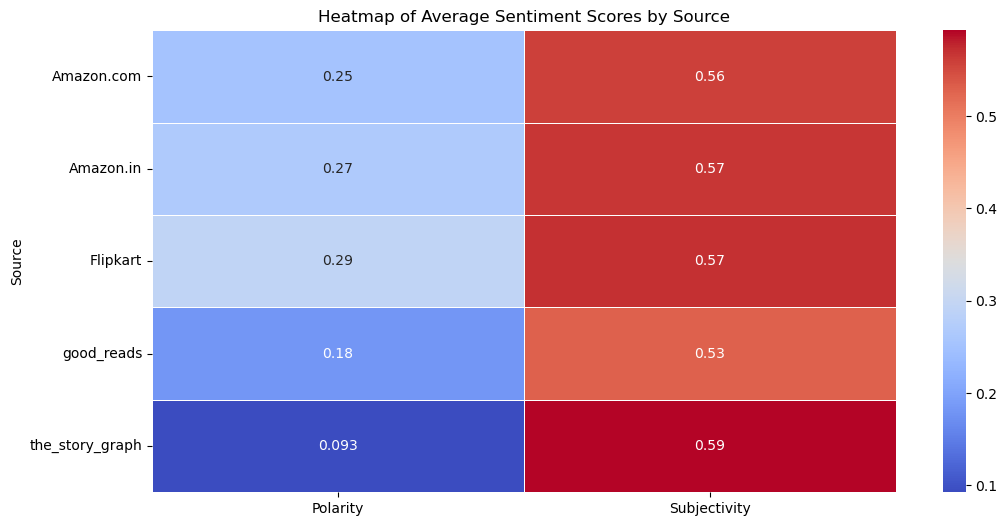

In [15]:
# Generate the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Heatmap of Average Sentiment Scores by Source')
plt.show()

In [16]:
# Path to the input Excel file
input_file = '/Users/navyakakandula/Desktop/Kari/Output Files/Book_Reviews.xlsx'
output_high_subjective_file = '/Users/navyakakandula/Desktop/Kari/Output Files/High_Subjective_Reviews.xlsx'


# Read the Excel file using openpyxl engine
excel_data = pd.ExcelFile(input_file, engine='openpyxl')

# Initialize a list to store high subjective reviews
high_subjective_reviews = []

# Perform sentiment analysis on each sheet and filter high subjective reviews
for sheet_name in excel_data.sheet_names:
    df = pd.read_excel(input_file, sheet_name=sheet_name, engine='openpyxl')
    
    # Ensure all entries in the 'Reviews' column are strings
    df['Reviews'] = df['Reviews'].astype(str)
    
    # Perform sentiment analysis
    df['Polarity'] = df['Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
    df['Subjectivity'] = df['Reviews'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
    
    # Filter high subjective reviews
    high_subjective_df = df[df['Subjectivity'] > 0.8]
    high_subjective_reviews.append(high_subjective_df)

# Concatenate all high subjective reviews into one DataFrame
high_subjective_reviews_df = pd.concat(high_subjective_reviews, ignore_index=True)

# Save the high subjective reviews to a new sheet in the output Excel file
with pd.ExcelWriter(output_high_subjective_file, engine='openpyxl') as writer:
    high_subjective_reviews_df.to_excel(writer, sheet_name='High_Subjective_Reviews', index=False)

print(f"High subjective reviews filtered and saved to {output_high_subjective_file}")


High subjective reviews filtered and saved to /Users/navyakakandula/Desktop/Kari/Output Files/High_Subjective_Reviews.xlsx


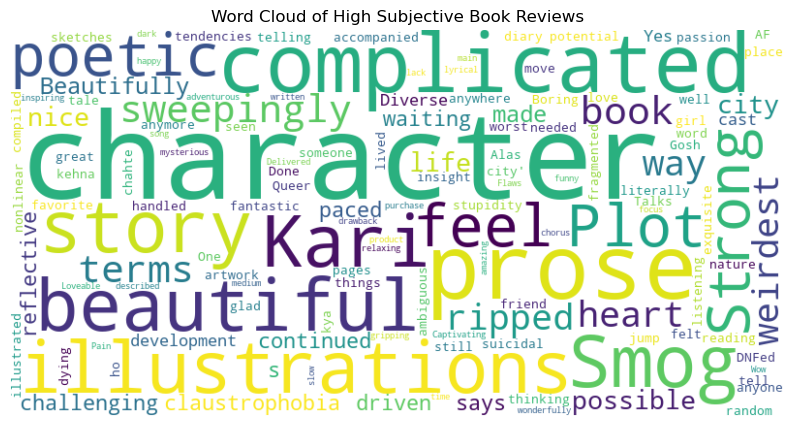

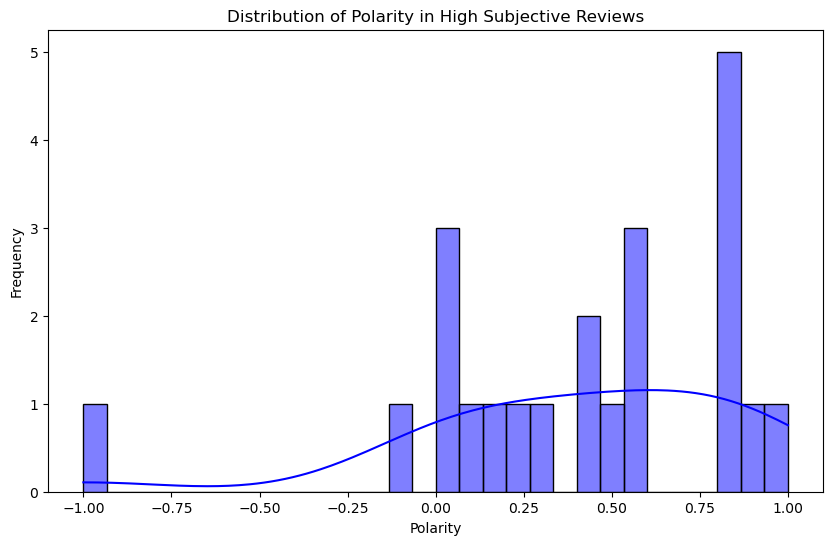

In [17]:
# Visualizations for high subjective reviews
# Combine all high subjective reviews into a single string for word cloud
text = ' '.join(review for review in high_subjective_reviews_df['Reviews'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of High Subjective Book Reviews')
plt.show()

# Plot the distribution of polarity for high subjective reviews
plt.figure(figsize=(10, 6))
sns.histplot(high_subjective_reviews_df['Polarity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Polarity in High Subjective Reviews')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()


Sentiment analysis saved to /Users/navyakakandula/Desktop/Kari/Output Files/Sentiment_Analysis_All.xlsx


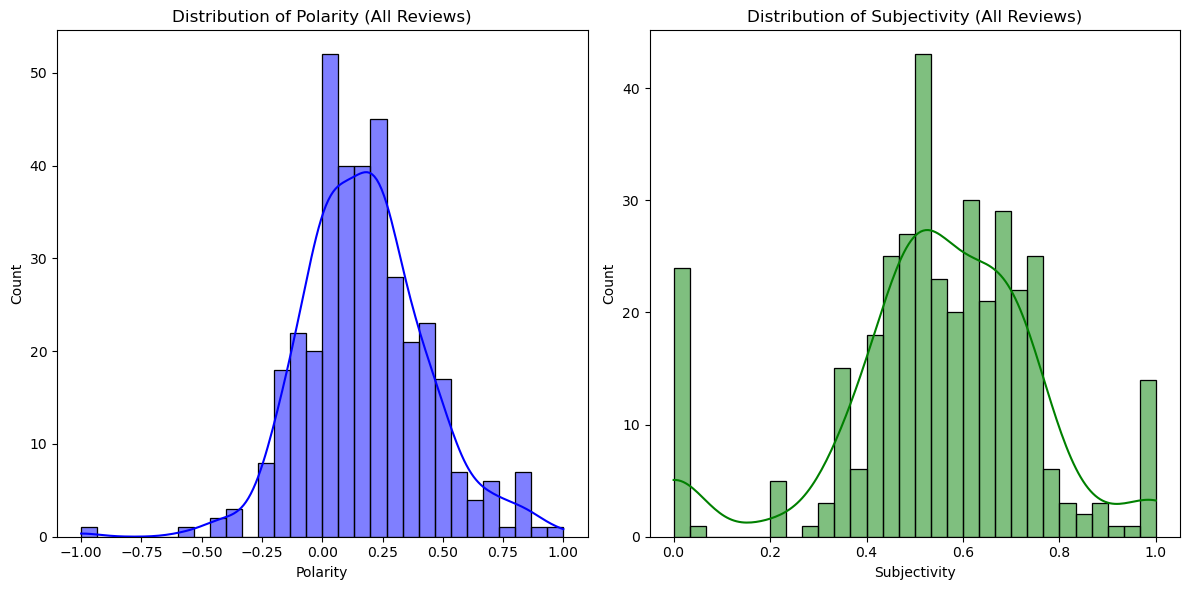

Correlation between Polarity & Subjectivity: r=0.30, p=0.0000


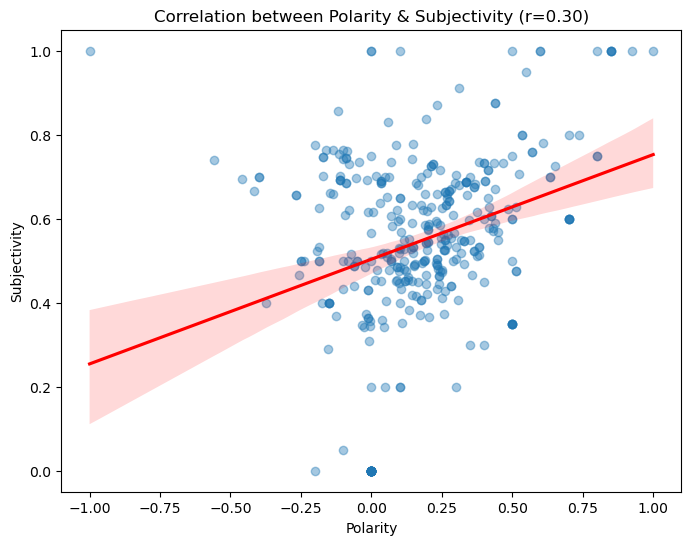


Correlation Table:
               Polarity  Subjectivity  Review_Length
Polarity       1.000000      0.298855      -0.061440
Subjectivity   0.298855      1.000000      -0.032444
Review_Length -0.061440     -0.032444       1.000000


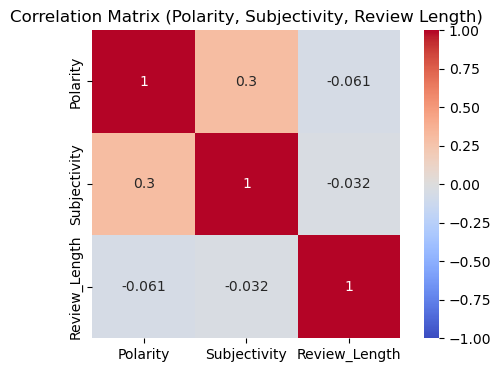

High subjective reviews saved to /Users/navyakakandula/Desktop/Kari/Output Files/High_Subjective_Reviews.xlsx


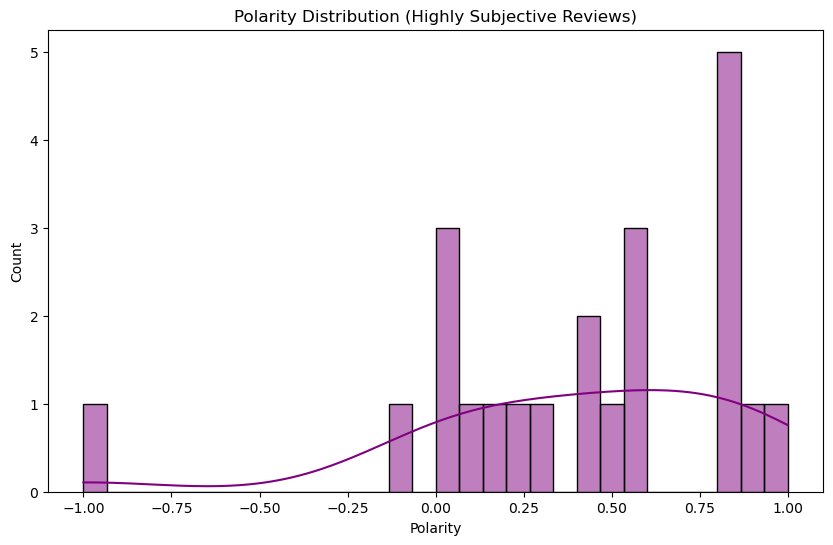

In [5]:
# ===============================
# Sentiment Analysis & Visualization (Final Cleaned Code)
# ===============================

# Install packages if needed:
# pip install pandas textblob openpyxl matplotlib seaborn scipy

import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# -------------------------------
# 1. Load all review sheets and combine
# -------------------------------
input_file = '/Users/navyakakandula/Desktop/Kari/Output Files/Book_Reviews.xlsx'
output_file = '/Users/navyakakandula/Desktop/Kari/Output Files/Sentiment_Analysis_All.xlsx'
output_high_subjective_file = '/Users/navyakakandula/Desktop/Kari/Output Files/High_Subjective_Reviews.xlsx'

excel_data = pd.ExcelFile(input_file, engine='openpyxl')
all_reviews = []

for sheet_name in excel_data.sheet_names:
    df = pd.read_excel(input_file, sheet_name=sheet_name, engine='openpyxl')
    df['Reviews'] = df['Reviews'].astype(str)
    df['Source'] = sheet_name  # keep track of source
    all_reviews.append(df)

all_df = pd.concat(all_reviews, ignore_index=True)

# -------------------------------
# 2. Sentiment Analysis
# -------------------------------
all_df['Polarity'] = all_df['Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
all_df['Subjectivity'] = all_df['Reviews'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Add review length (# of words)
all_df['Review_Length'] = all_df['Reviews'].apply(lambda x: len(x.split()))

# Save sentiment analysis results
all_df.to_excel(output_file, sheet_name='All_Reviews', index=False)
print(f"Sentiment analysis saved to {output_file}")

# -------------------------------
# 3. Basic Distribution (Aggregated)
# -------------------------------
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(all_df['Polarity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Polarity (All Reviews)')
plt.xlabel('Polarity')

plt.subplot(1,2,2)
sns.histplot(all_df['Subjectivity'], bins=30, kde=True, color='green')
plt.title('Distribution of Subjectivity (All Reviews)')
plt.xlabel('Subjectivity')

plt.tight_layout()
plt.show()

# -------------------------------
# 4. Correlation Analysis
# -------------------------------
# Pearson correlation values
corr, pval = pearsonr(all_df['Polarity'], all_df['Subjectivity'])
print(f"Correlation between Polarity & Subjectivity: r={corr:.2f}, p={pval:.4f}")

# Scatter plot with regression line
plt.figure(figsize=(8,6))
sns.regplot(x='Polarity', y='Subjectivity', data=all_df, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title(f'Correlation between Polarity & Subjectivity (r={corr:.2f})')
plt.show()

# Full correlation table including Review Length
corr_matrix = all_df[['Polarity','Subjectivity','Review_Length']].corr(method='pearson')
print("\nCorrelation Table:")
print(corr_matrix)

# Heatmap for correlation table
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, square=True)
plt.title("Correlation Matrix (Polarity, Subjectivity, Review Length)")
plt.show()

# -------------------------------
# 5. High Subjective Reviews (>0.8)
# -------------------------------
high_subjective = all_df[all_df['Subjectivity'] > 0.8]
high_subjective.to_excel(output_high_subjective_file, index=False)
print(f"High subjective reviews saved to {output_high_subjective_file}")

# Distribution of polarity for high subjective reviews
plt.figure(figsize=(10,6))
sns.histplot(high_subjective['Polarity'], bins=30, kde=True, color='purple')
plt.title('Polarity Distribution (Highly Subjective Reviews)')
plt.xlabel('Polarity')
plt.show()


In [12]:
# ===============================
# Sentiment Analysis Report Generator for "Kari" Reviews
# ===============================

# Install required packages if not already installed:
# pip install pandas textblob openpyxl matplotlib seaborn scipy python-docx

import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from docx import Document
from docx.shared import Inches

# ===============================
# 1. Load all review sheets and combine
# ===============================
input_file = '/Users/navyakakandula/Desktop/Kari/Output Files/Book_Reviews.xlsx'
output_file_excel = '/Users/navyakakandula/Desktop/Kari/Output Files/Sentiment_Analysis_All.xlsx'
output_high_subjective_file = '/Users/navyakakandula/Desktop/Kari/Output Files/High_Subjective_Reviews.xlsx'
doc_file = '/Users/navyakakandula/Desktop/Kari/Output Files/Sentiment_Analysis_Report.docx'

excel_data = pd.ExcelFile(input_file, engine='openpyxl')
all_reviews = []

for sheet_name in excel_data.sheet_names:
    df = pd.read_excel(input_file, sheet_name=sheet_name, engine='openpyxl')
    df['Reviews'] = df['Reviews'].astype(str)
    df['Source'] = sheet_name  # keep track of source platform
    all_reviews.append(df)

all_df = pd.concat(all_reviews, ignore_index=True)

# Platform counts
platform_counts = all_df['Source'].value_counts().to_dict()

# ===============================
# 2. Sentiment Analysis
# ===============================
all_df['Polarity'] = all_df['Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
all_df['Subjectivity'] = all_df['Reviews'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
all_df['Review_Length'] = all_df['Reviews'].apply(lambda x: len(x.split()))

# Save combined sentiment analysis results
all_df.to_excel(output_file_excel, sheet_name='All_Reviews', index=False)

# -------------------------------
# Top 5 Positive and Negative Reviews
# -------------------------------
top_positive = all_df.sort_values('Polarity', ascending=False).head(5)
top_negative = all_df.sort_values('Polarity', ascending=True).head(5)

# Highly subjective reviews (>0.8)
high_subjective = all_df[all_df['Subjectivity'] > 0.8]
high_subjective.to_excel(output_high_subjective_file, index=False)
hs_counts = high_subjective['Polarity'].value_counts().sort_index()

# ===============================
# 3. Generate Figures and Save to Files
# ===============================
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(all_df['Polarity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Polarity (All Reviews)')
plt.xlabel('Polarity')
plt.subplot(1,2,2)
sns.histplot(all_df['Subjectivity'], bins=30, kde=True, color='green')
plt.title('Distribution of Subjectivity (All Reviews)')
plt.xlabel('Subjectivity')
plt.tight_layout()
plt.savefig('/Users/navyakakandula/Desktop/Kari/Output Files/polarity_subjectivity_hist.png')
plt.close()

# Correlation scatter and regression
corr, pval = pearsonr(all_df['Polarity'], all_df['Subjectivity'])
plt.figure(figsize=(8,6))
sns.regplot(x='Polarity', y='Subjectivity', data=all_df, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title(f'Correlation between Polarity & Subjectivity (r={corr:.2f})')
plt.savefig('/Users/navyakakandula/Desktop/Kari/Output Files/polarity_subjectivity_scatter.png')
plt.close()

# Correlation heatmap
corr_matrix = all_df[['Polarity','Subjectivity','Review_Length']].corr(method='pearson')
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, square=True)
plt.title("Correlation Matrix (Polarity, Subjectivity, Review Length)")
plt.savefig('/Users/navyakakandula/Desktop/Kari/Output Files/correlation_matrix.png')
plt.close()

# Highly subjective polarity distribution
plt.figure(figsize=(10,6))
sns.histplot(high_subjective['Polarity'], bins=30, kde=True, color='purple')
plt.title('Polarity Distribution (Highly Subjective Reviews)')
plt.xlabel('Polarity')
plt.savefig('/Users/navyakakandula/Desktop/Kari/Output Files/high_subjective_polarity.png')
plt.close()

# ===============================
# 4. Create Word Report
# ===============================
doc = Document()

# Title
doc.add_heading('Sentiment Analysis Report: "Kari" by Amruta Patil', 0)

# Abstract
doc.add_heading('Abstract', level=1)
doc.add_paragraph(
    "This report presents a technical sentiment analysis of reviews for the book 'Kari' across multiple platforms. "
    "Polarity ∈ [−1,1] indexes evaluative stance (negative→positive); subjectivity ∈ [0,1] indexes opinionatedness vs. descriptiveness. "
    "We report distributional summaries, correlation analyses, highly subjective review patterns, top positive/negative reviews, and platform-specific statistics."
)

# Introduction
doc.add_heading('Introduction', level=1)
doc.add_paragraph(
    "Sentiment analysis quantifies subjective opinions in textual data. Polarity measures sentiment strength (-1 negative, 0 neutral, +1 positive), "
    "while subjectivity measures degree of personal opinion (0 objective, 1 highly subjective). This study analyzes reviews collected from Amazon, "
    "Flipkart, Goodreads, and StoryGraph. The analysis includes histograms, correlations, and highlights highly subjective reviews."
)

# Methods
doc.add_heading('Methods', level=1)
doc.add_paragraph(
    "Corpus Sources: Goodreads, Amazon, Flipkart, StoryGraph.\n"
    "Sample Size (N): {} reviews.\n"
    "Language: English only.\n"
    "Preprocessing: Convert to string, remove NaNs, track source platform.\n"
    "Sentiment Model: TextBlob lexicon-based polarity and subjectivity.\n"
    "Polarity ∈ [−1,1], Subjectivity ∈ [0,1].\n"
    "Validation: Manual check on 10% random sample; no inter-annotator agreement.\n"
    "Limitations: Sarcasm detection not included, code-switching ignored, domain mismatch possible, English-language bias.\n"
    "Visualizations generated include histograms, scatter plots with regression, and heatmaps."
    .format(all_df.shape[0])
)

# Results
doc.add_heading('Results', level=1)

# Add Polarity/Subjectivity Histogram
doc.add_paragraph('Distribution of Polarity and Subjectivity:')
doc.add_picture('/Users/navyakakandula/Desktop/Kari/Output Files/polarity_subjectivity_hist.png', width=Inches(6))
doc.add_paragraph(
    "Interpretation: Polarity distribution is centered around 0 (mostly neutral), while subjectivity is right-skewed (many subjective reviews)."
)

# Correlation scatter
doc.add_paragraph('Correlation between Polarity and Subjectivity:')
doc.add_picture('/Users/navyakakandula/Desktop/Kari/Output Files/polarity_subjectivity_scatter.png', width=Inches(5))
doc.add_paragraph(f"Interpretation: Weak positive correlation observed (r={corr:.2f}, p={pval:.4f}), indicating slightly higher positivity with more subjective reviews.")

# Correlation table
doc.add_heading('Correlation Table', level=2)
corr_table = doc.add_table(rows=1, cols=3)
hdr_cells = corr_table.rows[0].cells
hdr_cells[0].text = 'Polarity'
hdr_cells[1].text = 'Subjectivity'
hdr_cells[2].text = 'Review_Length'
for col in ['Polarity','Subjectivity','Review_Length']:
    for idx, row_name in enumerate(corr_matrix.index):
        if idx >= len(corr_table.rows):
            corr_table.add_row()
        corr_table.rows[idx].cells[corr_matrix.columns.get_loc(col)].text = f"{corr_matrix.loc[row_name, col]:.3f}"
doc.add_paragraph("Interpretation: Polarity and subjectivity weakly correlate (r≈0.30). Review length has negligible correlation with both.")

# Highly Subjective Reviews Histogram
doc.add_paragraph('Highly Subjective Reviews (Subjectivity >0.8):')
doc.add_picture('/Users/navyakakandula/Desktop/Kari/Output Files/high_subjective_polarity.png', width=Inches(6))
doc.add_paragraph("Interpretation: Highly subjective reviews skew positive, indicating strong opinions tend to be favorable.")

# Table for Highly Subjective Reviews (polarity distribution)
doc.add_heading('Polarity Distribution of Highly Subjective Reviews', level=2)
hs_table = doc.add_table(rows=1, cols=2)
hdr_cells = hs_table.rows[0].cells
hdr_cells[0].text = 'Polarity'
hdr_cells[1].text = 'Count'
for label, count in hs_counts.items():
    row_cells = hs_table.add_row().cells
    row_cells[0].text = f"{label:.2f}"
    row_cells[1].text = str(count)

# Top Positive Reviews
doc.add_heading('Top 5 Positive Reviews', level=2)
tp_table = doc.add_table(rows=1, cols=3)
hdr_cells = tp_table.rows[0].cells
hdr_cells[0].text = 'Polarity'
hdr_cells[1].text = 'Subjectivity'
hdr_cells[2].text = 'Review'
for _, row in top_positive.iterrows():
    row_cells = tp_table.add_row().cells
    row_cells[0].text = f"{row['Polarity']:.2f}"
    row_cells[1].text = f"{row['Subjectivity']:.2f}"
    row_cells[2].text = row['Reviews']

# Top Negative Reviews
doc.add_heading('Top 5 Negative Reviews', level=2)
tn_table = doc.add_table(rows=1, cols=3)
hdr_cells = tn_table.rows[0].cells
hdr_cells[0].text = 'Polarity'
hdr_cells[1].text = 'Subjectivity'
hdr_cells[2].text = 'Review'
for _, row in top_negative.iterrows():
    row_cells = tn_table.add_row().cells
    row_cells[0].text = f"{row['Polarity']:.2f}"
    row_cells[1].text = f"{row['Subjectivity']:.2f}"
    row_cells[2].text = row['Reviews']

# Platform Counts Table
doc.add_heading('Platform Review Counts', level=2)
platform_table = doc.add_table(rows=1, cols=3)
hdr_cells = platform_table.rows[0].cells
hdr_cells[0].text = 'Platform'
hdr_cells[1].text = 'Number of Reviews'
hdr_cells[2].text = 'Percentage of Total (%)'
total_reviews = all_df.shape[0]
for platform, count in platform_counts.items():
    row_cells = platform_table.add_row().cells
    row_cells[0].text = platform
    row_cells[1].text = str(count)
    row_cells[2].text = f"{(count/total_reviews)*100:.2f}"

doc.add_paragraph(f"Total reviews analyzed: {total_reviews}. Table above shows number and percentage of reviews per platform.")

# Discussion
doc.add_heading('Discussion', level=1)
doc.add_paragraph(
    "The analysis shows that most reviews are neutral to moderately positive. "
    "Highly subjective reviews tend to be positive. Weak positive correlation between polarity and subjectivity indicates that strong opinions slightly bias positivity. "
    "Review length has negligible impact on sentiment. "
    "Limitations include English-language bias, lexicon-based TextBlob model limitations, lack of sarcasm/code-switching detection, and platform-specific review tendencies. "
    "Future work may use transformer-based sentiment models and multi-lingual inclusion for robustness."
)

# Save Word Document
doc.save(doc_file)
print(f"Technical report saved to {doc_file}")


Technical report saved to /Users/navyakakandula/Desktop/Kari/Output Files/Sentiment_Analysis_Report.docx
